<a href="https://colab.research.google.com/github/Sreelu-git99/Adult-Income-Prediction-Census-Data/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind
from dataclasses import dataclass
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.datasets import make_blobs
import plotly.express as px
import keras
import sklearn.metrics
import sklearn

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


Converting into dataframe

In [3]:
# converting out data into a dataframe
df = pd.read_csv("adult.csv")
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# printing the coulmn names of our dataframe

for col in df.columns:
    print(col)

39
 State-gov
 77516
 Bachelors
 13
 Never-married
 Adm-clerical
 Not-in-family
 White
 Male
 2174
 0
 40
 United-States
 <=50K


In [5]:
# re-naming the dataframe's coulmn names

df = df.rename(columns={"39":"age", " State-gov":"workclass",
                        " 77516":"col1",
                        " Bachelors":"Education",
                        " 13":"education-num",
                       " Never-married":"marital-status", 
                        " Adm-clerical":"occupation",
                        " Not-in-family":"relationship", 
                       " White":"race", 
                        " Male":"sex", 
                        " 2174":"capital-gain", 
                        " 0":"capital-loss", 
                        " 40":"hours-per-week",
                       " United-States":"native-country",
                        " <=50K":"income-group"})

In [6]:
# the null values in our dataset have " ?" symbol
# counting the number of Null values in our dataset 
df[df == " ?"] = np.nan
df.isnull().sum()

age                  0
workclass         1836
col1                 0
Education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income-group         0
dtype: int64

In [7]:
# dropping the null values
df = df.dropna()
df

,age,workclass,col1,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We can notice that the education field and the education-num field are actually very similar, every category has a different value and it is always the same, so in order to reduce complexity, we can remove this data

In [8]:
df1 = df.drop(['Education'], axis=1)
df1

,age,workclass,col1,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Exploratory Data Analysis

In [9]:
df1.describe()

,age,col1,education-num,capital-gain,capital-loss,hours-per-week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Correlation between each of the coulmn names

In [10]:
# correlation between the columns (we can see the correlations between )
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-10-d536b53919ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


,age,col1,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043525,0.080154,0.060166,0.101599
col1,-0.076511,1.000000,-0.044954,0.000427,-0.009757,-0.022889
education-num,0.043525,-0.044954,1.000000,0.124413,0.079656,0.152528
capital-gain,0.080154,0.000427,0.124413,1.000000,-0.032228,0.080432
capital-loss,0.060166,-0.009757,0.079656,-0.032228,1.000000,0.052417
hours-per-week,0.101599,-0.022889,0.152528,0.080432,0.052417,1.000000


Pairplot to check if the spead of the data

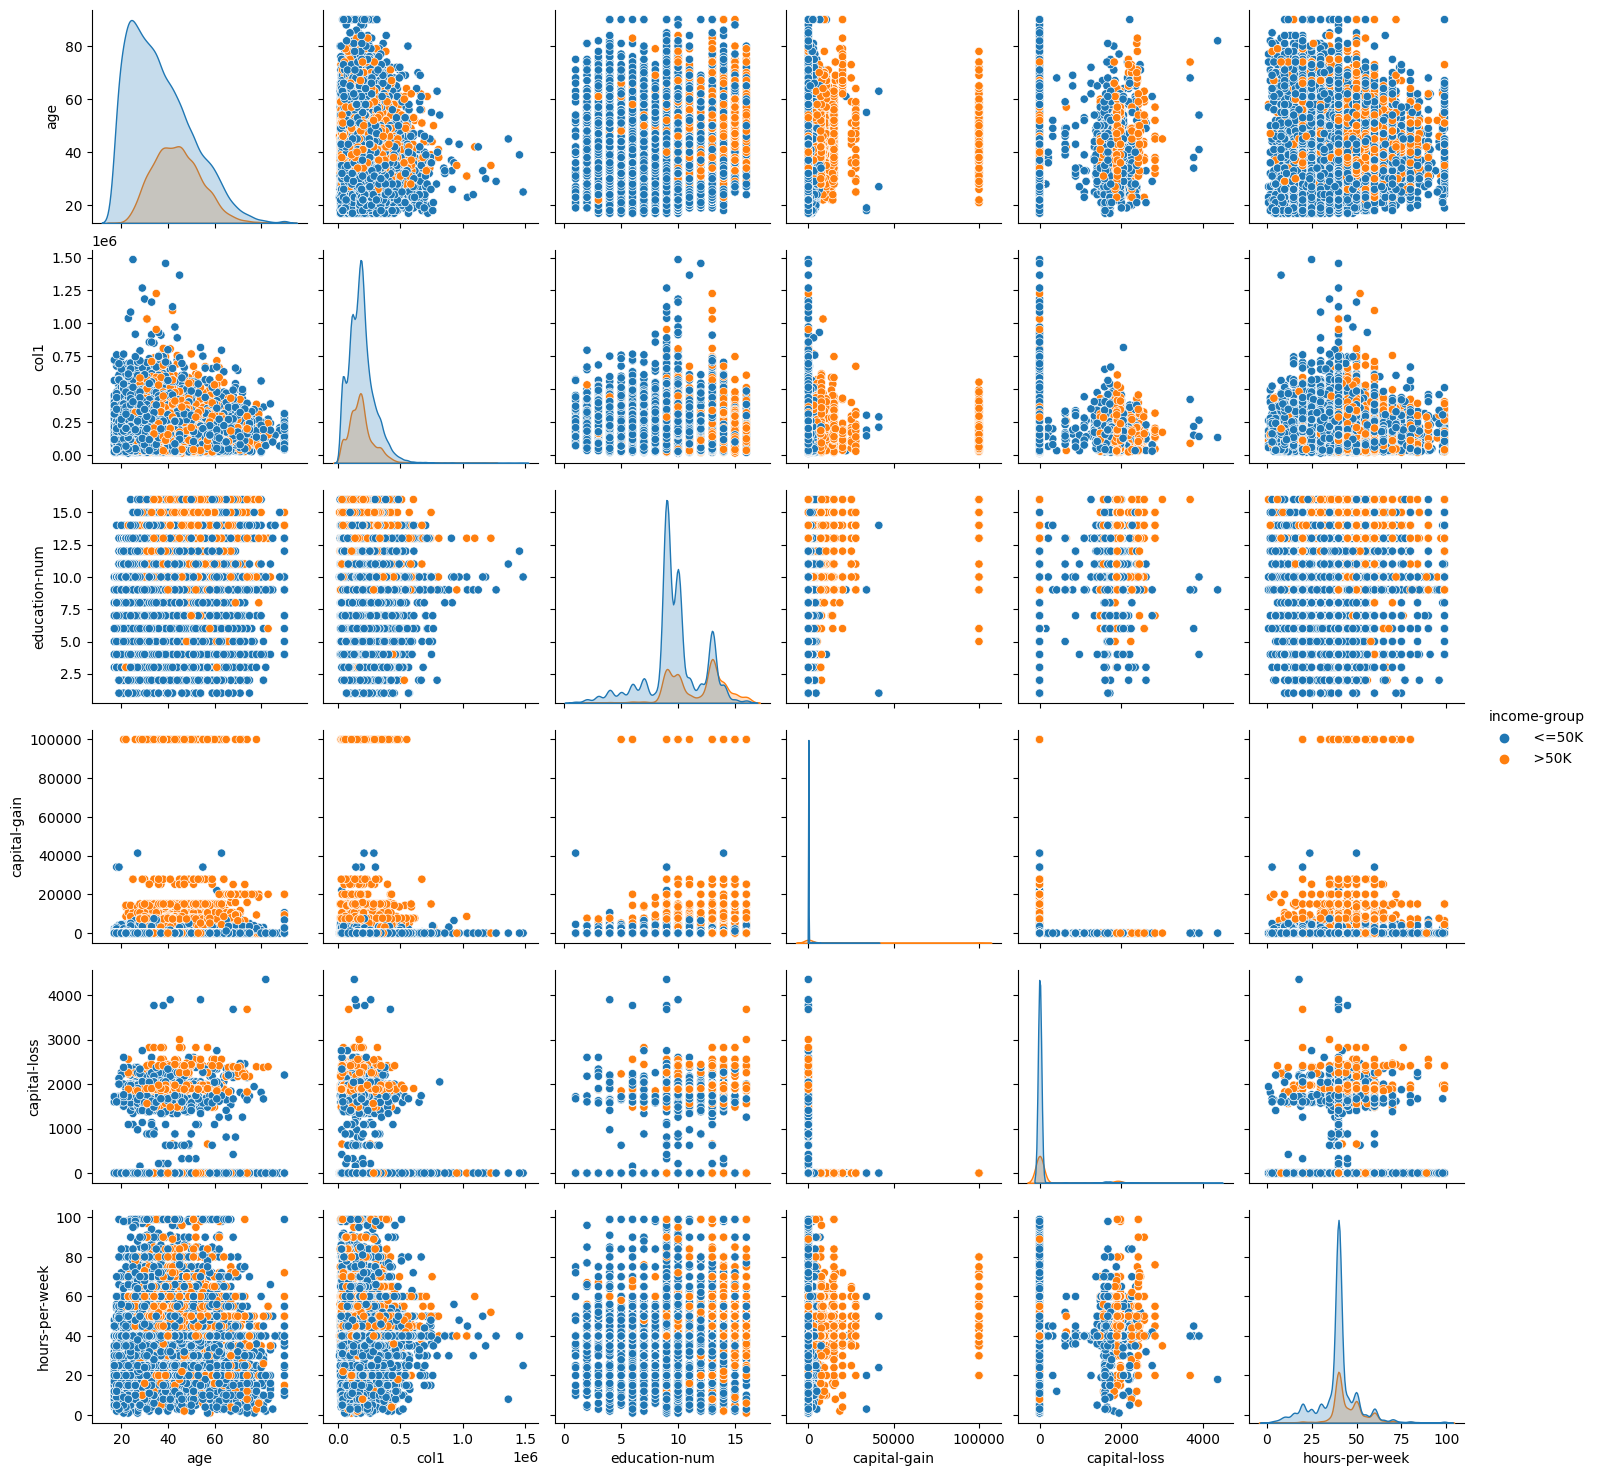

In [11]:
sns.pairplot(df1, hue='income-group')

Box plot to check if there are any kind of outliers

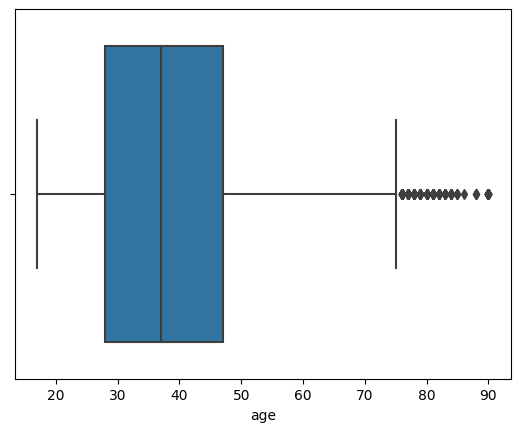

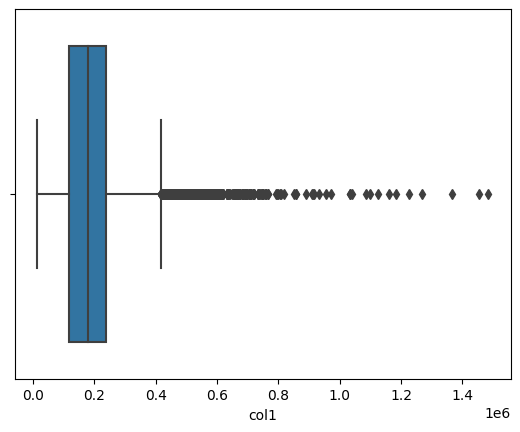

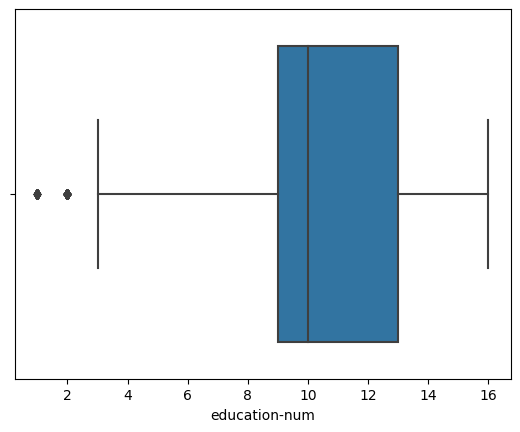

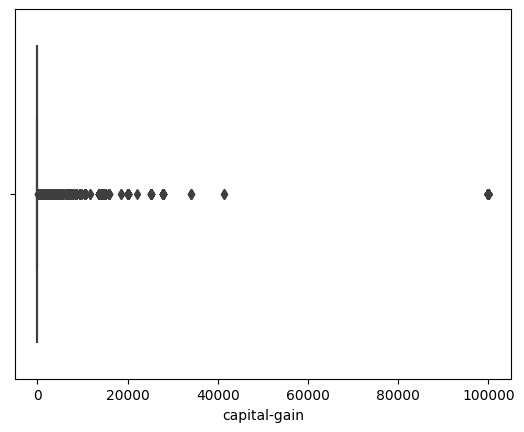

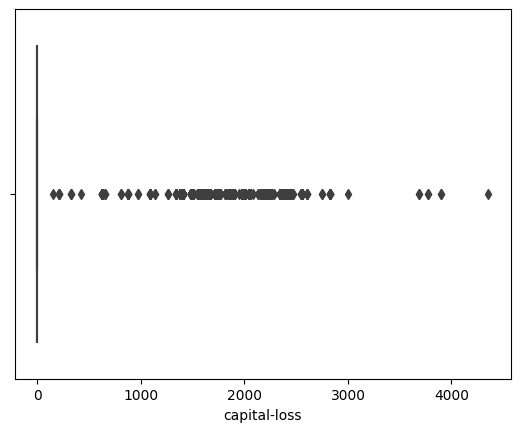

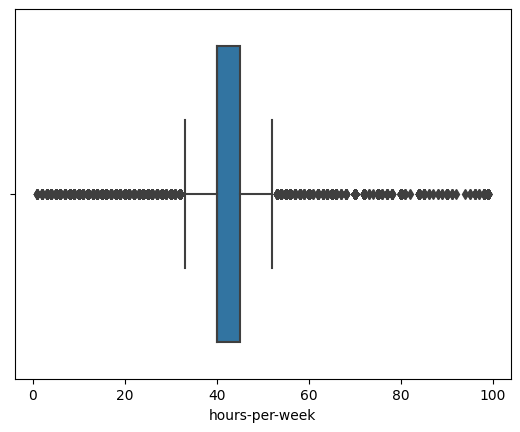

In [12]:
columns = ['age','col1','education-num','capital-gain','capital-loss','hours-per-week']
for i in columns:
  sns.boxplot(x = df1[i])
  plt.show()

In [13]:
# Based on the graph set the low bound and high bound
dff2 = df1[(df1['education-num'] <= 16) & (df1['education-num'] >= 3)]
# dff2 = df1[df1['capital-gain'] <= 50000]
# dff2= df1[df1['capital-loss'] <= 3200]
# dff2 = df1[(df1['hours-per-week'] <= 100) & (df1['hours-per-week'] >= 20)]
dff2 = dff2[dff2['capital-gain'] <= 50000]
dff2= dff2[dff2['capital-loss'] <= 3200]
dff2 = dff2[(dff2['hours-per-week'] <= 100) & (df1['hours-per-week'] >= 20)]

<ipython-input-13-c9c415c6dbaa>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff2 = dff2[(dff2['hours-per-week'] <= 100) & (df1['hours-per-week'] >= 20)]


In [14]:
df2 = dff2

In [15]:
# df1.groupby('workclass')['income-group'].count()

pxt = df2.groupby('workclass')['income-group'].count().reset_index()

pxt

,workclass,income-group
0,Federal-gov,919
1,Local-gov,1984
2,Private,21059
3,Self-emp-inc,1021
4,Self-emp-not-inc,2304
5,State-gov,1192
6,Without-pay,11


In [16]:
px.bar(pxt, x='workclass', y='income-group')

In [17]:
#mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)

In [18]:
# unique values of the categorical data (martial status and native country)
print(
      '** Marital-status **:' , df1['marital-status'].unique(),'\n',
      '** native-country **:', df1['native-country'].unique()
     )

** Marital-status **: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 
 ** native-country **: [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [19]:
# grouping categorical data (martial-status/native-country)



df1['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse' ],'Married-spouse',inplace=True)

df1['native-country'].replace([' England',' Scotland'],'UK',inplace=True)
df1['native-country'].replace([' Portugal',' Germany',' Italy',' Yugoslavia',' Hungary',
                                ' Greece', ' Poland',' France' ,' Holand-Netherlands'],'Other-Europe',inplace=True)
df1['native-country'].replace([' Philippines',' Vietnam',' Thailand',' Cambodia',' Laos',' Japan',' India',' Iran'],'Other-Asia',inplace=True)
df1['native-country'].replace([' United-States',' Puerto-Rico',' Outlying-US(Guam-USVI-etc)',' Canada'],'North-America',inplace=True)
df1['native-country'].replace([' China',' Taiwan',' Hong'],'China',inplace=True)
df1['native-country'].replace([' Peru',' Mexico',' Dominican-Republic',' Haiti',
                              ' Cuba',' Guatemala',' Columbia',' Nicaragua', ' Honduras',
                               ' Jamaica' ,' Ecuador',' El-Salvador',' Trinadad&Tobago'] , 'Latin-America',inplace=True)

In [20]:
# grouping categorical data (martial-status/native-country)


df2['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse' ],'Married-spouse',inplace=True)

df2['native-country'].replace([' England',' Scotland'],'UK',inplace=True)
df2['native-country'].replace([' Portugal',' Germany',' Italy',' Yugoslavia',' Hungary',
                                ' Greece', ' Poland',' France' ,' Holand-Netherlands'],'Other-Europe',inplace=True)
df2['native-country'].replace([' Philippines',' Vietnam',' Thailand',' Cambodia',' Laos',' Japan',' India',' Iran'],'Other-Asia',inplace=True)
df2['native-country'].replace([' United-States',' Puerto-Rico',' Outlying-US(Guam-USVI-etc)',' Canada'],'North-America',inplace=True)
df2['native-country'].replace([' China',' Taiwan',' Hong'],'China',inplace=True)
df2['native-country'].replace([' Peru',' Mexico',' Dominican-Republic',' Haiti',
                              ' Cuba',' Guatemala',' Columbia',' Nicaragua', ' Honduras',
                               ' Jamaica' ,' Ecuador',' El-Salvador',' Trinadad&Tobago'] , 'Latin-America',inplace=True)

Binning all numerical data to a range of categories

In [21]:
def binningFunc(df, col):

  min_val = df[col].min()
  max_val = df[col].max()

  if col not in ['capital-gain', 'capital-loss']:

    bins = np.linspace(min_val, max_val, 5)
    labels = [0, 1, 2, 3]

    df[col] = pd.cut(x = df[col], bins = bins, labels = labels, include_lowest = True)
    print(df[col])
  else:

    bins = np.linspace(min_val, max_val, 6)
    labels = [0, 1, 2, 3, 4]

    x = np.array(df[col])
    x_index_not0 = [i for i in range(len(x)) if x[i] != 0]
    x_cut_not0 = pd.cut(x[x != 0], bins-1, labels=False) + 1
    df[col] = np.where(df[col] != 0, x_cut_not0, 0)
    # y[x_index_not0] = x_cut_not0

    # df[col] = pd.cut(x = df[col], bins = bins, labels = labels, include_lowest = True) + 1
    print(df[col])
  return df[col]

In [22]:
df1['col1'] = binningFunc(df1, col='col1')

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    0
32557    0
32558    0
32559    0
Name: col1, Length: 30161, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [23]:
df1['col1'].value_counts()

0    28692
1     1433
2       28
3        8
Name: col1, dtype: int64

In [24]:
df1.head()

,age,workclass,col1,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,50,Self-emp-not-inc,0,13,Married-spouse,Exec-managerial,Husband,White,Male,0,0,13,North-America,<=50K
1,38,Private,0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North-America,<=50K
2,53,Private,0,7,Married-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North-America,<=50K
3,28,Private,0,13,Married-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Latin-America,<=50K
4,37,Private,0,14,Married-spouse,Exec-managerial,Wife,White,Female,0,0,40,North-America,<=50K


In [25]:
df2.isna().sum()

age               0
workclass         0
col1              0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income-group      0
dtype: int64

In [26]:
df2.head()

,age,workclass,col1,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North-America,<=50K
2,53,Private,234721,7,Married-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North-America,<=50K
3,28,Private,338409,13,Married-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Latin-America,<=50K
4,37,Private,284582,14,Married-spouse,Exec-managerial,Wife,White,Female,0,0,40,North-America,<=50K
6,52,Self-emp-not-inc,209642,9,Married-spouse,Exec-managerial,Husband,White,Male,0,0,45,North-America,>50K


In [27]:
df2['col1'] = binningFunc(df2, col='col1')

1        0
2        0
3        0
4        0
6        0
        ..
32555    0
32556    0
32557    0
32558    0
32559    0
Name: col1, Length: 28490, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [28]:
df2.head()

,age,workclass,col1,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
1,38,Private,0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North-America,<=50K
2,53,Private,0,7,Married-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North-America,<=50K
3,28,Private,0,13,Married-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Latin-America,<=50K
4,37,Private,0,14,Married-spouse,Exec-managerial,Wife,White,Female,0,0,40,North-America,<=50K
6,52,Self-emp-not-inc,0,9,Married-spouse,Exec-managerial,Husband,White,Male,0,0,45,North-America,>50K


In [29]:
df2['col1'].value_counts()

0    27120
1     1336
2       27
3        7
Name: col1, dtype: int64

In [30]:
df1['age']= binningFunc(df1, col='age')

0        1
1        1
2        1
3        0
4        1
        ..
32555    0
32556    1
32557    2
32558    0
32559    1
Name: age, Length: 30161, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [31]:
df1['age'].value_counts()

0    13738
1    12205
2     3888
3      330
Name: age, dtype: int64

In [32]:
df1.isna().sum()

age               0
workclass         0
col1              0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income-group      0
dtype: int64

In [33]:
df2['age']= binningFunc(df2, col='age')

1        1
2        1
3        0
4        1
6        1
        ..
32555    0
32556    1
32557    2
32558    0
32559    1
Name: age, Length: 28490, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [34]:
df2.head()

,age,workclass,col1,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
1,1,Private,0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North-America,<=50K
2,1,Private,0,7,Married-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North-America,<=50K
3,0,Private,0,13,Married-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Latin-America,<=50K
4,1,Private,0,14,Married-spouse,Exec-managerial,Wife,White,Female,0,0,40,North-America,<=50K
6,1,Self-emp-not-inc,0,9,Married-spouse,Exec-managerial,Husband,White,Male,0,0,45,North-America,>50K


In [35]:
df2.isna().sum()

age               0
workclass         0
col1              0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income-group      0
dtype: int64

In [36]:
df1['hours-per-week']= binningFunc(df1, col='hours-per-week')

0        0
1        1
2        1
3        1
4        1
        ..
32555    1
32556    1
32557    1
32558    0
32559    1
Name: hours-per-week, Length: 30161, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [37]:
df1['hours-per-week'].value_counts()

1    23425
0     3261
2     3080
3      395
Name: hours-per-week, dtype: int64

In [38]:
df2['hours-per-week'] = binningFunc(df2, col='hours-per-week')

1        1
2        1
3        1
4        1
6        1
        ..
32555    0
32556    1
32557    1
32558    0
32559    1
Name: hours-per-week, Length: 28490, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [39]:
df2['hours-per-week'].value_counts()

1    20778
0     5308
2     2095
3      309
Name: hours-per-week, dtype: int64

In [40]:
df1['capital-loss'].value_counts()

0       28734
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capital-loss, Length: 90, dtype: int64

Hypothesis testing

In [41]:
df1['income-group'] = df1['income-group'].apply(lambda x: x.strip())

In [42]:
df1['income-group'] = np.where(df1['income-group'] == '<=50K', 0, 1)

In [43]:
df1['income-group'].value_counts()

0    22653
1     7508
Name: income-group, dtype: int64

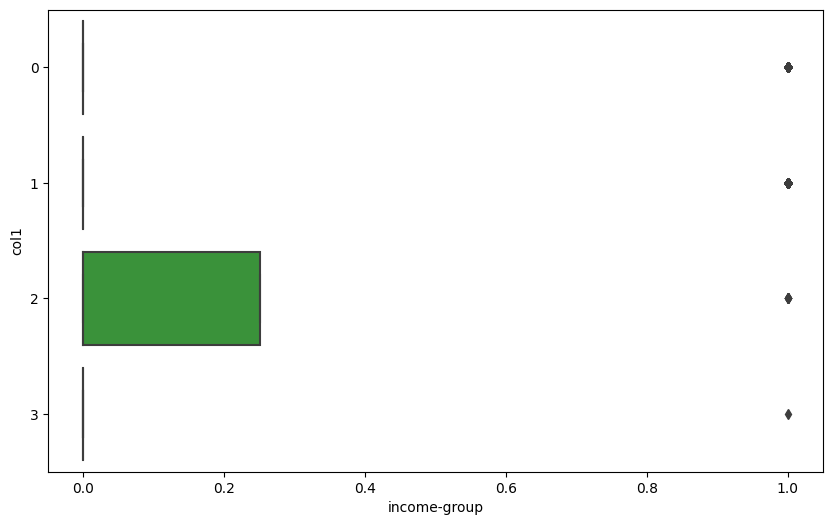

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income-group', y='col1', data=df1)

plt.show()

In [45]:
df1_income0 = df1.loc[df1['income-group'] == 0]['col1']
df1_income1 = df1.loc[df1['income-group'] == 1]['col1']

In [46]:
ttest_ind(df1_income0, df1_income1, equal_var=False)

Ttest_indResult(statistic=1.8597724415896186, pvalue=0.06293940065449172)

Since t-test result gives a p-value greater than 0.05, we can accept the null hypothesis.

Label Encoding 

In [47]:
#df1['income-group']=df1['income-group'].map({'<=50K': 0, '>50K': 1})

In [48]:
from sklearn.preprocessing import LabelEncoder
catg = ['workclass', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
le = LabelEncoder()
for i in catg:
    le.fit(df1[i])
    df1[i] = le.transform(df1[i])

In [49]:
#df2['income-group']=df2['income-group'].map({'<=50K': 0, '>50K': 1})
# new addition NOW!!!!!!!!!!1


df2['income-group'] = df2['income-group'].apply(lambda x: x.strip())
df2['income-group'] = np.where(df2['income-group'] == '<=50K', 0, 1)

In [50]:
from sklearn.preprocessing import LabelEncoder
catg = ['workclass', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
le = LabelEncoder()
for i in catg:
    le.fit(df2[i])
    df2[i] = le.transform(df2[i])

In [51]:
# After our hypothesis testing, we are dropping 'col1' column 
# this is stored in a new dataframe df3
df3 = df2.drop(columns=['col1'], axis=1)
df3

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
1,1,2,9,0,5,1,4,1,0,0,1,4,0
2,1,2,7,5,5,0,2,1,0,0,1,4,0
3,0,2,13,5,9,5,2,0,0,0,1,3,0
4,1,2,14,5,3,5,4,0,0,0,1,4,0
6,1,4,9,5,3,0,4,1,0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,2,12,5,12,5,4,0,0,0,0,4,0
32556,1,2,9,5,6,0,4,1,0,0,1,4,1
32557,2,2,9,4,0,4,4,0,0,0,1,4,0
32558,0,2,9,2,0,3,4,1,0,0,0,4,0


In [52]:
df2

,age,workclass,col1,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
1,1,2,0,9,0,5,1,4,1,0,0,1,4,0
2,1,2,0,7,5,5,0,2,1,0,0,1,4,0
3,0,2,0,13,5,9,5,2,0,0,0,1,3,0
4,1,2,0,14,5,3,5,4,0,0,0,1,4,0
6,1,4,0,9,5,3,0,4,1,0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,2,0,12,5,12,5,4,0,0,0,0,4,0
32556,1,2,0,9,5,6,0,4,1,0,0,1,4,1
32557,2,2,0,9,4,0,4,4,0,0,0,1,4,0
32558,0,2,0,9,2,0,3,4,1,0,0,0,4,0


Splitting the Dataset

In [53]:
# spliting the dataset
# our income column is our label, so that will be 'y'

from sklearn.model_selection import train_test_split
X = df1.drop(['income-group'], axis=1)
y = df1['income-group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# filtered data
X2 = df2.drop(['income-group'], axis=1)
y2 = df2['income-group']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
y_train.index = range(len(y_train))
y_test.index = range(len(y_test))

# filtered data
X2_train = pd.DataFrame(scaler.fit_transform(X2_train), columns = X2.columns)
X2_test = pd.DataFrame(scaler.transform(X2_test), columns = X2.columns)
y2_train.index = range(len(y2_train))
y2_test.index = range(len(y2_test))

In [55]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(21112, 13) (9049, 13) (21112,) (9049,)
(19943, 13) (8547, 13) (19943,) (8547,)


In [56]:
columns = list(X_train.columns.values)
columns

['age',
 'workclass',
 'col1',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

Checking if our data is linear or not before executing PCA

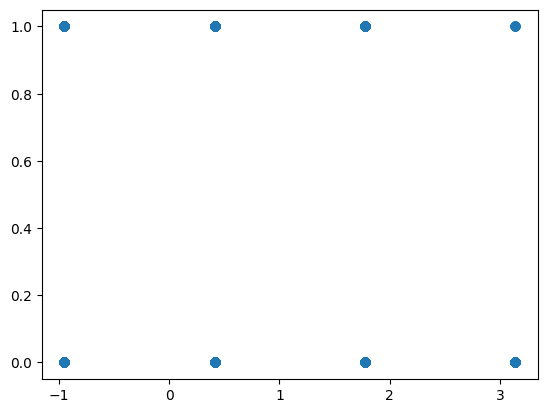

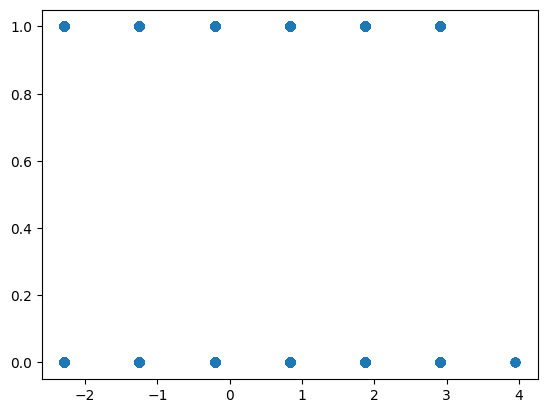

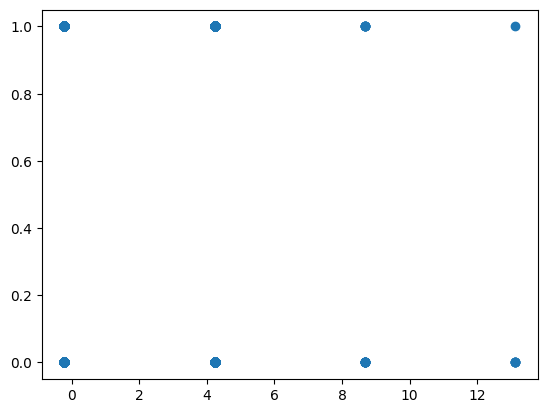

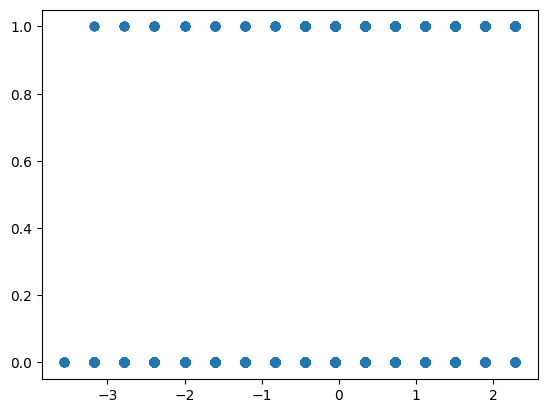

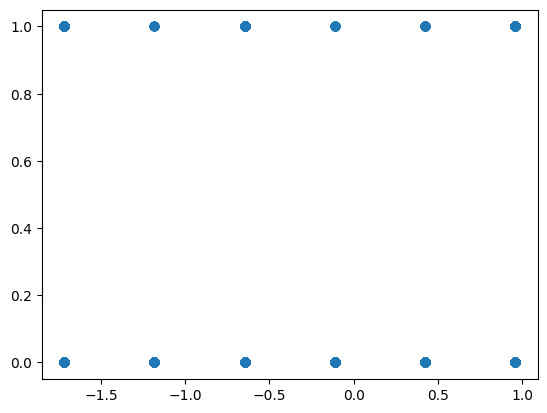

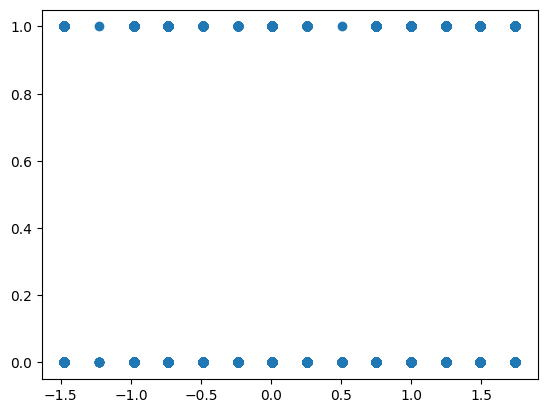

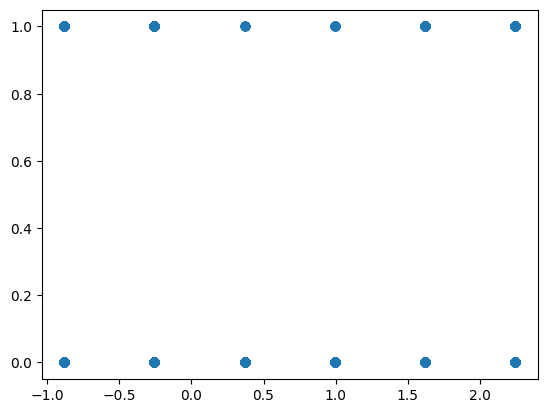

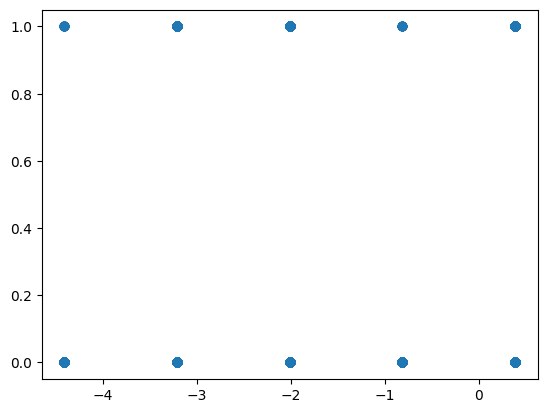

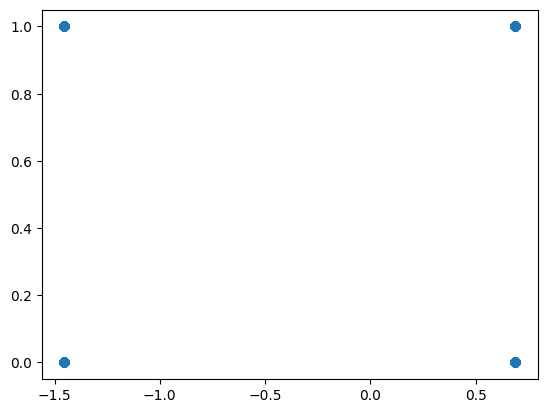

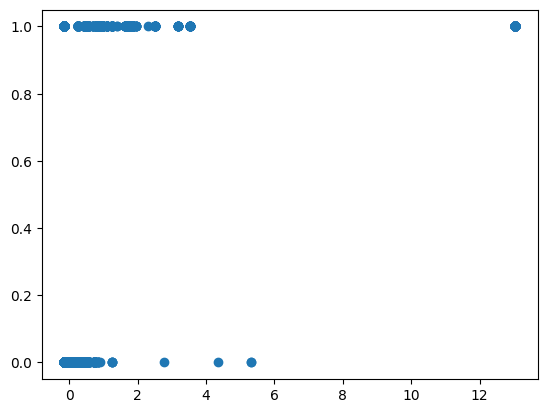

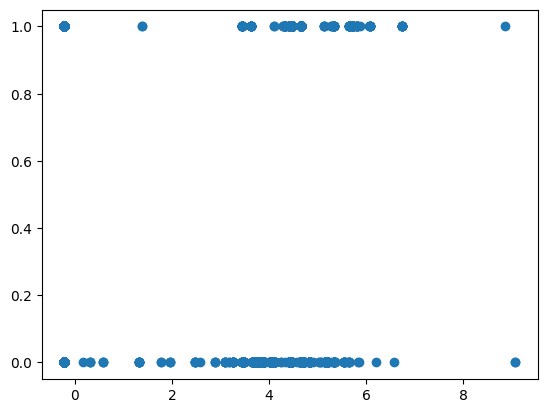

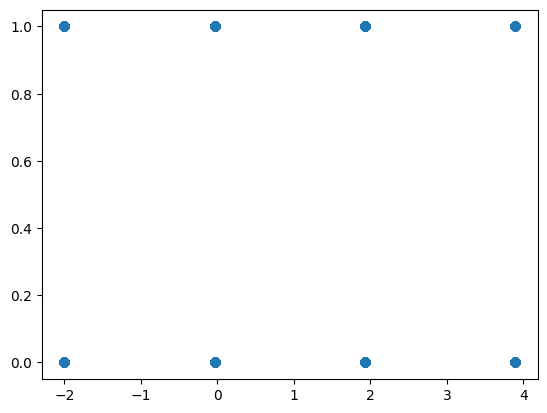

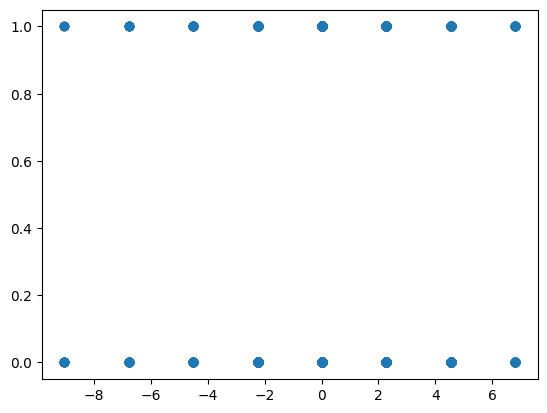

In [57]:
# checking if our data is linear, so we can apply PCA to our dataset

for i in columns:
  plt.scatter(X_train[i], y_train)
  plt.show()

# plt.scatter(X_train['age'], y_train)
# plt.show()

In [58]:
# Our data is linear, so we are going to apply PCA to our dataset

In [59]:
df1 = df1.astype({'age':'int', 'col1':'int', 'hours-per-week':'int'})
print(df1.dtypes)

age               int64
workclass         int64
col1              int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income-group      int64
dtype: object


In [60]:
df2 = df2.astype({'age':'int', 'col1':'int', 'hours-per-week':'int'})
print(df2.dtypes)

age               int64
workclass         int64
col1              int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income-group      int64
dtype: object


In [61]:
def pca(dataframe, n_components):
    
    
    # Normalize the data
    normalized_data = (dataframe - dataframe.mean()) / dataframe.std()
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(normalized_data, rowvar=False)
    
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort the eigenvalues in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    
    # Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(selected_eigenvectors.T, normalized_data.T).T
    
    # Convert the reduced data back to a DataFrame
    reduced_dataframe = pd.DataFrame(reduced_data, columns=['PC{}'.format(i+1) for i in range(n_components)])
    
    # Convert column names back to original names
    original_columns = dataframe.columns
    original_names = dict(zip(['PC{}'.format(i+1) for i in range(n_components)], original_columns))
    reduced_dataframe = reduced_dataframe.rename(columns=original_names)
    
    return reduced_dataframe

In [62]:
df3 = pca(df1,11)

In [63]:
df3

,age,workclass,col1,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss
0,0.874752,0.514291,1.416060,0.658666,-0.463525,-0.761841,-0.551105,-0.745108,0.629745,-1.915610,1.242717
1,-0.619606,0.570061,0.438576,-0.036273,-0.384872,0.277070,-0.078340,0.104888,-0.263732,0.482981,-0.449149
2,0.439241,1.592052,-0.020556,0.553040,0.991842,-0.014716,1.532285,0.851097,0.962766,-0.354193,-0.440990
3,-1.849573,-0.899167,-1.982467,0.398679,0.764310,-1.676531,0.814931,1.147811,-0.517296,-0.469686,1.418554
4,-1.180796,-1.615839,0.614862,0.222074,0.386458,0.211470,-0.442858,-0.007762,-0.309091,0.297140,1.250874
...,...,...,...,...,...,...,...,...,...,...,...
30156,-1.468864,-1.305822,-0.560936,-0.598765,-0.886679,-0.706249,0.379811,-0.539320,-0.385562,0.180182,0.421039
30157,1.845643,0.347193,0.297816,0.067837,0.346146,0.275101,0.407296,-0.399343,-0.382617,-0.043916,0.397612
30158,-1.246841,-0.377011,1.740980,1.048394,1.338130,0.316634,-0.432099,-0.044071,-0.320314,1.153522,0.387332
30159,-1.622966,0.715572,0.703365,0.050728,0.169744,0.849851,-0.390952,-0.546880,-0.470522,-1.833673,0.222316


In [64]:
# X3 = df3.drop(['income-group','hours-per-week',	'native-country'], axis=1)
X3 = df3
y3 = df1['income-group']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0)

In [65]:
# After PCA and Hypothesis
X3_train = pd.DataFrame(scaler.fit_transform(X3_train), columns = X3.columns)
X3_test = pd.DataFrame(scaler.transform(X3_test), columns = X3.columns)
y3_train.index = range(len(y3_train))
y3_test.index = range(len(y3_test))

In [66]:
print(X_train.shape)
print(X3_train.shape)

(21112, 13)
(21112, 11)


Logistic Regression

In [67]:
class LogisticRegression:
#     learningRate : float
#     maxIteration : int
#     epsilon : float

    def __init__(self, X_train, y_train, X_test, y_test, learningRate, epsilon, maxIteration): 
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.learningRate = learningRate
        self.epsilon = epsilon
        self.maxIteration = maxIteration
    
    # def splitData(self):
    #   XX_train, XX_test, yy_train, yy_test = train_test_split(self.X, self.y, test_size=0.3, shuffle = True)
    #   return XX_train, XX_test, yy_train, yy_test  


        
    

        
    # def readDataset(self):
    #     X_train = pd.read_excel('Lab3_data.xls', sheet_name='2004--2005 Data')
    #     X_test = pd.read_excel('Lab3_data.xls', sheet_name='2004--2007 Data')
    #     X_train = np.array(X_train, dtype=np.float64)
    #     X_test = np.array(X_test, dtype=np.float64)
        
            
    #     self.y_train = X_train[:, 0]
    #     self.y_test = X_train[:, 0]
    #     self.X_train = X_train[:, 1:]  
    #     self.X_test = X_test[:, 1:]


        
    def sigmoid(self,z):
        sig = 1 / (1+np.exp(-z))
        return sig
    
    def costFunction(self, X,y):
        sig = self.sigmoid(X.dot(self.w))
        loss = y * np.log(sig) + (1-y)*np.log(1-sig)
        cost = -loss.sum()
        return cost
    
    def gradient(self, X,y):
        sig = self.sigmoid(X.dot(self.w))
        return (sig-y).dot(X)
    
    def gradientDescent(self,X,y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.maxIteration),colour='red'):
            self.w = self.w - self.learningRate * self.gradient(X,y)
            current_error = self.costFunction(X,y)
            errors.append(current_error)
            
            if np.abs(prev_error - current_error) < self.epsilon:
                print("MODEL STOPPED LEARNING")
                break
                
            prev_error = current_error
        self.plot_cost(errors)
        
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = y == 1
        y_hat = y_hat == 1
        accuracy = (y == y_hat).sum()/y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        f_score = 2 * (precision * recall) / (precision + recall)
        
        return accuracy, precision, recall, f_score
        


    def fit(self):
        

        #self.X_train, self.X_test, self.y_train, self.y_test = self.splitData()
        self.w = np.zeros(self.X_train.shape[1], dtype=np.float64)
        self.gradientDescent(self.X_train, self.y_train)
        
        self.y_hat_train = self.predict(self.X_train)
        accuracy, precision, recall, f_score = self.evaluate(self.y_train, self.y_hat_train)

        print("The model has an accuracy of {}".format(accuracy))
        print("The model has a precision of {}".format(precision))
        print("The model has a recall of {}".format(recall))
        print("The model has a f1_score of {}".format(f_score))
        
        # calculating the bias and variance of the model
        y_hat_train = self.predict(self.X_train)
        y_hat_test = self.predict(self.X_test)
        train_error = ((y_hat_train - self.y_train)**2).mean() # bias^2 + variance
        test_error = ((y_hat_test - self.y_test)**2).mean() # bias^2 + variance
        bias_squared = ((self.y_train - y_hat_train.mean())**2).mean()
        variance = ((y_hat_train - y_hat_train.mean())**2).mean()

        print('train_error', train_error)
        print('test_error', test_error)
        print('bias sq', bias_squared)
        print('var', variance)
        
        
        
        
    
    
    def plot_cost(self,cost_sequence):
        
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()
        
       
        


 41%|████      | 4096/10000 [00:33<00:42, 140.48it/s]/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

100%|██████████| 10000/10000 [01:20<00:00, 124.67it/s]


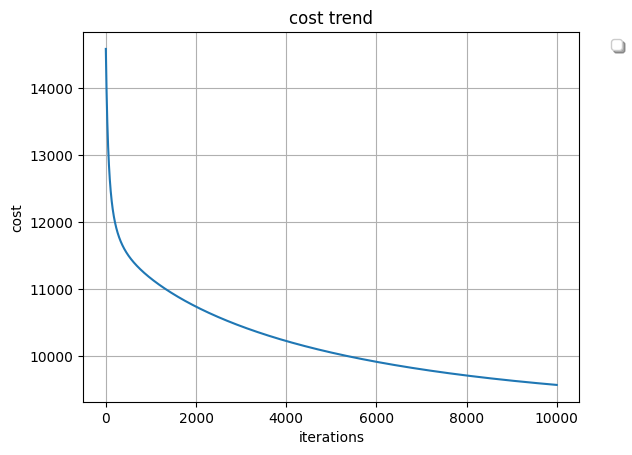

The model has an accuracy of 0.8041398256915498
The model has a precision of 0.5863965267727931
The model has a recall of 0.7603677988365547
The model has a f1_score of 0.6621456001307297
train_error 0.19586017430845018
test_error 0.19670681843297602
bias sq 0.19430996934230918
var 0.22017540367539065


In [68]:
lr = LogisticRegression(X_train = X_train, y_train = y_train, X_test=X_test, y_test=y_test , epsilon=0.0001, learningRate=0.1e-5, maxIteration=10000)
lr.fit()

In [ ]:
lr = LogisticRegression(X_train = X2_train, y_train = y2_train, X_test=X2_test, y_test=y2_test , epsilon=0.0001, learningRate=0.1e-5, maxIteration=10000)
lr.fit()

 73%|███████▎  | 7335/10000 [00:59<00:39, 67.46it/s]

In [ ]:
lr = LogisticRegression(X_train = X3_train, y_train = y3_train, X_test=X3_test, y_test=y3_test , epsilon=0.0001, learningRate=0.1e-5, maxIteration=10000)
lr.fit()

Naive Bayes

In [ ]:
class GaussianNaiveBayes:
  def __init__(self, X_train, y_train, X_test, y_test):
      self.X_train = np.array(X_train)
      self.y_train = np.array(y_train)
      self.X_test = np.array(X_test)
      self.y_test = np.array(y_test)

  
  def likelihood(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean, std)
    return dist

  
  def posterior(self, x, prior, dist):
    post = prior
    for i, d in enumerate(dist):
      post *= d.pdf(x[i])
    return post

  def fit(self):
    X0_train = self.X_train[self.y_train == 0]           # number of points belonging to class 0
    X1_train = self.X_train[self.y_train == 1]           # number of points belonging to class 1

    self.prior0 = len(X0_train) / len(self.X_train)
    self.prior1 = len(X1_train) / len(self.X_train)

    self.X0_dist = np.array([])
    self.X1_dist = np.array([])

    for i in range(self.X_train.shape[1]):
      X0_dist_i = self.likelihood(X0_train[:, i])               # dimension i of class 0
      X1_dist_i = self.likelihood(X1_train[:, i])               # dimension i of class 1

      self.X0_dist = np.append(self.X0_dist, X0_dist_i)
      self.X1_dist = np.append(self.X1_dist, X1_dist_i)

  def predict(self):
    self.pred_train = []
    self.actual_train = []

    self.pred_test = []
    self.actual_test = []

    self.train_errors = []
    self.test_errors = []

    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.posterior(sample, self.prior0, self.X0_dist)
      py1 = self.posterior(sample, self.prior1, self.X1_dist)
      z = py0 + py1

      self.pred_test.append(np.argmax([py0, py1]))
      self.actual_test.append(target)

      test_error = (np.array((self.pred_test) - np.array(self.actual_test))**2).mean() # bias^2 + varian

      self.test_errors.append(test_error)

    for sample, target in zip(self.X_train, self.y_train):
      py0 = self.posterior(sample, self.prior0, self.X0_dist)
      py1 = self.posterior(sample, self.prior1, self.X1_dist)
      z = py0 + py1

      self.pred_train.append(np.argmax([py0, py1]))
      self.actual_train.append(target)

      train_error = ((np.array(self.pred_train) - np.array(self.actual_train))**2).mean() # bias^2 + variance

      self.train_errors.append(train_error)


  def score(self):
    cols = range(1, self.X_train.shape[1]+1)

    self.accuracy = (np.array(self.pred_test) == np.array(self.actual_test)).sum() / len(self.pred_test)
    self.precision = (np.array(self.pred_test) & np.array(self.actual_test)).sum() / sum(self.pred_test)
    self.recall = (np.array(self.pred_test) & np.array(self.actual_test)).sum() / sum(self.actual_test)
    self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

    print('Accuracy is {}.'.format(self.accuracy))
    print('Precision is {}.'.format(self.precision))
    print('Recall is {}.'.format(self.recall))
    print('F1 Score is {}'.format(self.F1_score))

    # self.pred_test, self.pred_train, self.actual_train. self.actual_test = self.predict()
    # train_error = ((np.array(self.pred_train) - self.actual_train)**2).mean() # bias^2 + variance
    # test_error = ((self.pred_test - self.actual_test)**2).mean() # bias^2 + variance
    bias_squared = ((np.array(self.pred_train) - np.array(self.pred_test).mean())**2).mean()
    variance = np.var(self.pred_train)

    #print('train_error', train_error)
    #print('test_error', test_error)
    print('bias sq', bias_squared)
    print('var', variance)

    # plt.plot(cols, self.train_errors, label='Train error')
    # plt.plot(cols, self.test_errors, label='Test error')


    

In [ ]:
gnb = GaussianNaiveBayes(X_train, y_train, X_test, y_test)
gnb.fit()
gnb.predict()
gnb.score()

In [ ]:
gnb = GaussianNaiveBayes(X2_train, y2_train, X2_test, y2_test)
gnb.fit()
gnb.predict()
gnb.score()

In [ ]:
gnb = GaussianNaiveBayes(X3_train, y3_train, X3_test, y3_test)
gnb.fit()
gnb.predict()
gnb.score()

In [ ]:
class NeuralNets:
    def __init__(self, X_train, y_train, X_test, y_test):
      self.X_train = X_train
      self.y_train = y_train
      self.X_test = X_test
      self.y_test = y_test
    
    def __post_init__(self):
        self.splitData()
      
    
    #def splitData(self):
      #X =  df.iloc[:, 0:-1]
      #y = df.iloc[:, -1]

      #self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.20, random_state=5)
      #scaler = StandardScaler()
      #scaler.fit(self.X_train)
      #X_train = scaler.transform(self.X_train)
      #X_test = scaler.transform(self.X_test)

      #print(self.X_train)

    def fit_predict(self):

      n = self.X_train.shape[0]
      d = self.X_train.shape[1]

      inputs = keras.layers.Input(shape=(d,), name='input_layer')
      hidden_layer1 = keras.layers.Dense(24, activation='tanh', name='hidden_layer1')(inputs)
      hidden_layer2 = keras.layers.Dense(24, activation='relu', name='hidden_layer2')(hidden_layer1)
      outputs = keras.layers.Dense(1, activation='sigmoid', name='output_layer')(hidden_layer2)

      model = keras.models.Model(inputs=inputs, outputs=outputs, name='neural_network')
      model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])

      model.fit(self.X_train, self.y_train, epochs=100)

      predictions = model.predict(self.X_train)

      predictions[predictions >= 0.5] = 1
      predictions[predictions < 0.5] = 0

      accuracy = sklearn.metrics.accuracy_score(self.y_train, predictions)
      print('accuracy: {0:.2f}'.format(accuracy * 100))

      r = sklearn.metrics.classification_report(self.y_train, predictions, output_dict=True)
      precision = r['macro avg']['precision']
      print(precision)

      recall = r['macro avg']['recall']
      print(recall)

      f1_score = r['macro avg']['f1-score']
      print(f1_score)

      # print(sklearn.metrics.confusion_matrix(self.y_train, predictions))

      predictions = model.predict(self.X_test)
      print(predictions)

      predictions[predictions >= 0.5] = 1
      predictions[predictions < 0.5] = 0

      print('predictions after', predictions)

      predictions = np.asarray(predictions)

      print('predictions after 2', predictions)

      self.y_test = np.asarray(self.y_test)

      accuracy_value = sklearn.metrics.accuracy_score(self.y_test, predictions)

In [ ]:
nn = NeuralNets(X_train, y_train, X_test, y_test)

In [ ]:
nn.fit_predict()

In [ ]:
nn2 = NeuralNets(X2_train, y2_train, X2_test, y2_test)

In [ ]:
nn2.fit_predict()

In [ ]:
nn3 = NeuralNets(X3_train, y3_train, X3_test, y3_test)

In [ ]:
nn3.fit_predict()